# **CAPÍTULO 10: ARCHIVOS Y EXCEPCIONES**
* Lectura de un archivo
* Lectura del contenido de un archivo
* Rutas de archivo relativas y absolutas
* Acceso a las líneas de un archivo
* Trabajar con el contenido de un archivo
* Archivos grandes: un millón de dígitos
* ¿Está tu cumpleaños contenido en Pi?
* Ejercicio 10-1: Aprendiendo Python
* Ejercicio 10-2: Aprendiendo C
* Ejercicio 10-3: Código más simple
* Escritura en un archivo
* Escribir una sola línea
* Escribir múltiples líneas
* Ejercicio 10-4: Invitado
* Ejercicio 10-5: Libro de visitas
* Excepciones
* Manejo de la excepción ZeroDivisionError
* Uso de bloques try-except
* Utilizar excepciones para prevenir bloqueos
* El bloque else
* Manejo de la excepción FileNotFoundError
* Análisis de texto
* Trabajar con varios archivos
* Fracaso silencioso
* Decidir qué errores informar
* Ejercicio 10-6: Suma
* Ejercicio 10-7: Calculadora de suma
* Ejercicio 10-8: Gatos y perros
* Ejercicio 10-9: Gatos y perros silenciosos
* Ejercicio 10-10: Palabras comunes
* Almacenamiento de datos
* Uso de json.dumps() y json.loads()
* Guardar y leer datos generados por el usuario
* Refactorización
* Ejercicio 10-11: Número favorito
* Ejercicio 10-12: Número favorito recordado
* Ejercicio 10-13: Diccionario de usuario
* Ejercicio 10-14: Verificación de usuario
* Resumen

# ARCHIVOS Y EXCEPCIONES

Ahora que has dominado las habilidades básicas necesarias para escribir programas organizados que sean fáciles de usar, es hora de pensar en hacer que tus programas sean aún más relevantes y utilizables. En este capítulo, aprenderás a trabajar con archivos para que tus programas puedan analizar rápidamente grandes cantidades de datos.

Aprenderás a manejar errores para que tus programas no se bloqueen cuando encuentren situaciones inesperadas. Conocerás las excepciones, que son objetos especiales que Python crea para gestionar los errores que surgen mientras un programa se está ejecutando. También aprenderás sobre el módulo **`json`**, que te permitirá guardar datos de usuario para que no se pierdan cuando tu programa deje de ejecutarse.

Aprender a trabajar con archivos y guardar datos hará que tus programas sean más fáciles de usar. Los usuarios podrán elegir qué datos ingresar y cuándo ingresarlos. Las personas podrán ejecutar tu programa, hacer algún trabajo y luego cerrar el programa y retomar donde lo dejaron. Aprender a manejar excepciones te ayudará a lidiar con situaciones en las que los archivos no existen y a abordar otros problemas que pueden hacer que tus programas se bloqueen. Esto hará que tus programas sean más robustos cuando encuentren datos incorrectos, ya sea por errores inocentes o por intentos malintencionados de romper tus programas. Con las habilidades que aprenderás en este capítulo, harás que tus programas sean más aplicables, utilizables y estables.

**Nota:**

Las excepciones en Python o Django se utilizan principalmente para manejar errores que pueden ocurrir durante la ejecuciòn del programa, evitando que este se detenga de forma abrupta. Se implementan en los contextos donde es importante garantizar la estabilidad del sistema o responder de manera controlada a situaciones inesperadas.


### 1. Validaciòn de entradas del usuario

Cuando un usuario ingresa datos (como un formulario de autenticaciòn), es crucial manejar errores como valores no vàlidos o credenciales incorrectas.

```python
from django.core.exceptions import ValidationError

def authenticate_user(request):
    username = request.POST.get('username')
    password = request.POST.get('password')

    try:
        user = authenticate(username=username,password=password)
        if user is None:
            raise ValidationError("Credenciales incorrectas")
        login(request, user)
        return HttpResponse('Inicio de sesiòn exitoso')
    except ValidationError as e:
        return HttpResponse(f"Error: {e}")
```

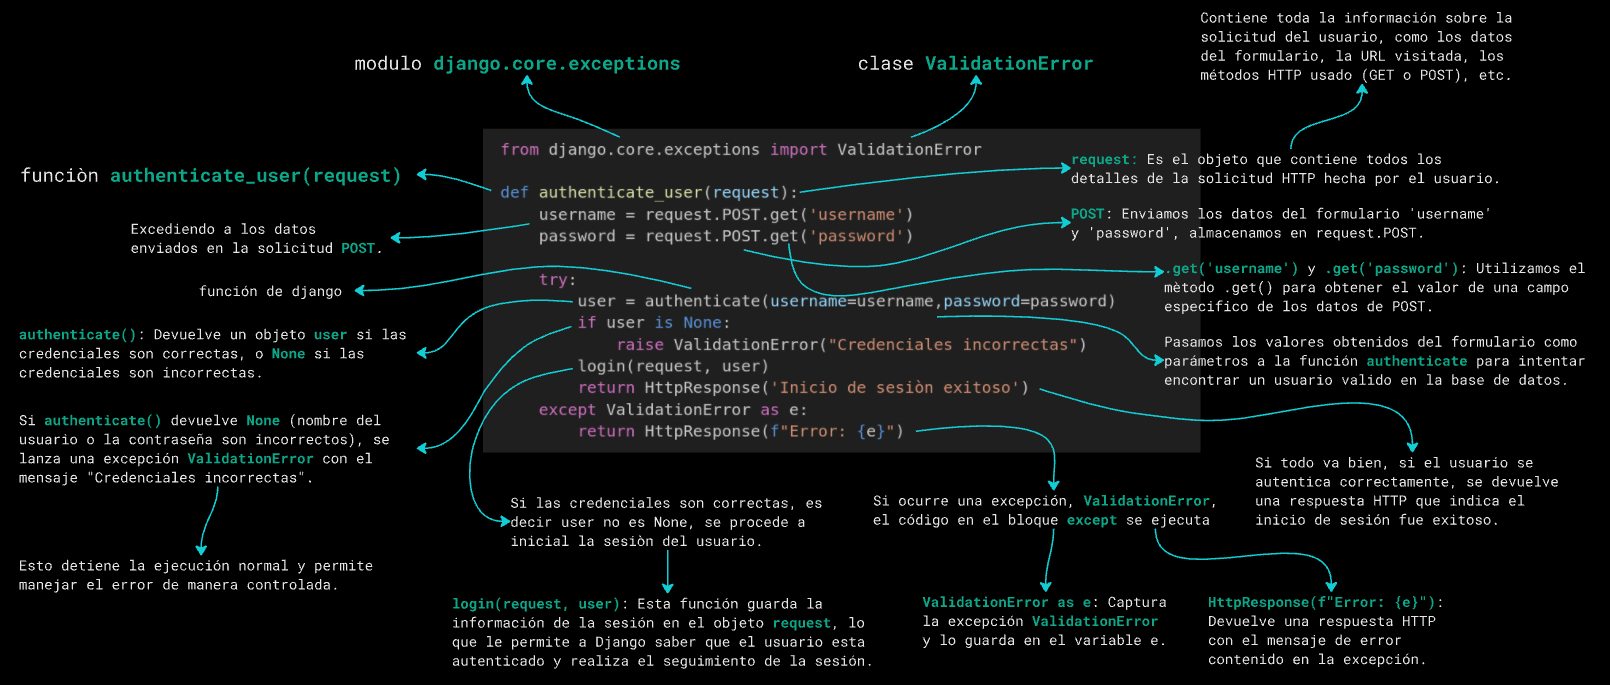

# Lectura desde un Archivo

Una cantidad increíble de datos está disponible en archivos de texto. Los archivos de texto pueden contener datos meteorológicos, datos de tráfico, datos socioeconómicos, obras literarias y más. Leer desde un archivo es especialmente útil en aplicaciones de análisis de datos, pero también es aplicable a cualquier situación en la que desees analizar o modificar información almacenada en un archivo. Por ejemplo, puedes escribir un programa que lea el contenido de un archivo de texto y vuelva a escribir el archivo con un formato que permita que un navegador lo muestre.

Cuando deseas trabajar con la información en un archivo de texto, el primer paso es leer el archivo en la memoria. Luego puedes trabajar a través de todo el contenido del archivo de una vez o trabajar a través del contenido línea por línea.

# Leyendo el contenido de un archivo

Para empezar, necesitamos un archivo con algunas líneas de texto. Comencemos con un archivo que contenga el valor de pi hasta 30 decimales, con 10 decimales por línea:

```python
pi_digits.txt
3.1415926535
8979323846
2643383279
```

Para probar los siguientes ejemplos por ti mismo, puedes ingresar estas líneas en un editor y guardar el archivo como pi_digits.txt, o puedes descargar el archivo desde los recursos del libro a través de https://ehmatthes.github.io/pcc_3e. Guarda el archivo en el mismo directorio donde almacenarás los programas de este capítulo.

Aquí tienes un programa que abre este archivo, lo lee y imprime el contenido del archivo en la pantalla:

In [2]:
from pathlib import Path    # Importamos la clase Path de pathlib

path = Path('pi_digits.txt')
contents = path.read_text()
print(contents)

3.1415926535
8979323846
2643383279


Para trabajar con el contenido de un archivo, necesitamos decirle a Python la ruta del archivo. Una ruta es la ubicación exacta de un archivo o carpeta en un sistema. Python proporciona un módulo llamado **`pathlib`** que facilita el trabajo con archivos y directorios, sin importar el sistema operativo que tú o los usuarios de tu programa estén utilizando. Un módulo que proporciona funcionalidades específicas como esta se llama a menudo biblioteca, de ahí el nombre pathlib.

Comenzamos importando la clase Path de pathlib. Hay mucho que puedes hacer con un objeto Path que apunta a un archivo. Por ejemplo, puedes verificar que el archivo exista antes de trabajar con él, leer el contenido del archivo o escribir nuevos datos en el archivo. Aquí, creamos un objeto Path que representa el archivo `pi_digits.txt`, al que asignamos a la variable `path`. Dado que este archivo está guardado en el mismo directorio que el archivo .py que estamos escribiendo, el nombre del archivo es todo lo que Path necesita para acceder al archivo.

**NOTA:**

VS Code busca archivos en la carpeta que fue abierta más recientemente.
Si estás utilizando VS Code, comienza abriendo la carpeta donde estás almacenando los programas de este capítulo. Por ejemplo, si estás guardando tus archivos de programa en una carpeta llamada chapter_10, presiona CTRL-O (⌘-O en macOS) y abre esa carpeta.

Una vez que tenemos un objeto Path que representa a pi_digits.txt, utilizamos el método `read_text()` para leer todo el contenido del archivo. El contenido del archivo se devuelve como una cadena única, que asignamos a la variable `contents`. Cuando imprimimos el valor de `contents`, vemos todo el contenido del archivo de texto:

```python
3.1415926535
8979323846
2643383279
```

La única diferencia entre esta salida y el archivo original es la línea en blanco adicional al final de la salida. La línea en blanco aparece porque `read_text()` devuelve una cadena vacía cuando alcanza el final del archivo; esta cadena vacía se muestra como una línea en blanco.

Podemos eliminar la línea en blanco adicional utilizando `rstrip()` en la cadena `contents`:

In [3]:
from pathlib import Path

path = Path('pi_digits.txt')
contents = path.read_text()
contents = contents.rstrip()
print(contents)

3.1415926535
8979323846
2643383279


Recuerda del Capítulo 2 que el método `rstrip()` de Python elimina, o "strips", cualquier carácter de espacio en blanco del lado derecho de una cadena. Ahora, la salida coincide exactamente con el contenido del archivo original:

```python
3.1415926535
8979323846
2643383279
```

Podemos eliminar el carácter de nueva línea al final cuando leemos el contenido del archivo, aplicando el método `rstrip()` inmediatamente después de llamar a `read_text()`:

In [4]:
contents = path.read_text().rstrip()

Esta línea le indica a Python que llame al método `read_text()` en el archivo con el que estamos trabajando. Luego, aplica el método `rstrip()` a la cadena que devuelve `read_text()`. La cadena depurada se asigna a la variable `contents`. Este enfoque se llama "method chaining" (encadenamiento de métodos), y lo verás utilizado con frecuencia en programación.

# Rutas de archivos relativas y absolutas

Cuando pasas un nombre de archivo simple como pi_digits.txt a Path, Python busca en el directorio donde se encuentra almacenado el archivo que se está ejecutando actualmente (es decir, tu archivo .py de programa).
A veces, dependiendo de cómo organices tu trabajo, es posible que el archivo que desees abrir no esté en el mismo directorio que tu archivo de programa. Por ejemplo, podrías almacenar tus archivos de programa en una carpeta llamada python_work; dentro de python_work, podrías tener otra carpeta llamada text_files para distinguir tus archivos de programa de los archivos de texto que están manipulando. Aunque text_files está dentro de python_work, simplemente pasarle a Path el nombre de un archivo en text_files no funcionará, porque Python solo buscará en python_work y se detendrá allí; no buscará en text_files. Para que Python abra archivos desde un directorio que no sea donde se almacena tu archivo de programa, necesitas proporcionar la ruta correcta.
Hay dos formas principales de especificar rutas en programación. Una ruta de archivo relativa le indica a Python que busque en una ubicación dada en relación con el directorio donde se almacena actualmente el archivo de programa en ejecución. Dado que text_files está dentro de python_work, necesitamos construir una ruta que comience con el directorio text_files y termine con el nombre del archivo. Así es cómo construir esta ruta: